# Load Libraries / Modules

In [365]:
# Basic

import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from datetime import datetime

In [364]:
# Model selection 

from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

In [273]:
# Scoring

# Make roc auc scoring func
from sklearn.metrics import roc_auc_score
from sklearn.metrics import make_scorer
def roc_scorer_fun(ground_truth, predictions):
    return roc_auc_score(ground_truth, predictions[:, 1])
roc_scorer = make_scorer(roc_scorer_fun, needs_proba = True)

# Other success metrics
from sklearn.metrics import recall_score
from sklearn.metrics import confusion_matrix

In [192]:
# Define folds... to be used rest of testing

folds = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 30) 

In [551]:
# Start model tracking lists

models = []
AUC_training = []
AUC_holdout = []

# Get data

In [95]:
import ticket_prediction_data
import importlib
_ = importlib.reload(ticket_prediction_data)

In [114]:
data_fetcher = ticket_prediction_data.Ticket_PredictionData()
data_fetcher._get_main()
data_fetcher._get_perf()

Connection working!
Querying for main table
Got main table
Querying for performers
Dummying performers
Performers dummied


In [297]:
X_train, X_holdout, Y_train, Y_holdout = data_fetcher.get_data(max_venues=50, max_events=50, 
                                                               max_zones=15, max_perf=50)

Already have data... don't need to query again
Simplifying venues
Venues simplified
Simplifying events
Events simplified
Simplifying zones
Zones simplified
Dummying performers
Performers dummied
Concatanating dummied performers
Performers concatanated
Starting final cleanup
Done


In [376]:
X_train.shape

(853755, 180)

# Logistic Regression -- Getting Started

In [12]:
from sklearn.linear_model import LogisticRegression

In [170]:
scale = StandardScaler()
X_train_s = scale.fit_transform(X = X_train)

,0,1,2,3,4,5,6,7,8,9,...,170,171,172,173,174,175,176,177,178,179
0,-0.479675,-0.98843,0.862062,-0.102235,-0.345902,-0.041947,-0.680071,-0.075160,-0.344806,-0.849360,...,-0.231083,-0.230664,-0.261845,-0.142271,-0.251591,-0.510419,-0.114431,-0.244608,-0.113434,-0.16964
1,0.431464,-0.98843,0.862062,-0.102235,-0.345902,-0.041947,-0.680071,-0.075160,-0.344806,1.177357,...,-0.231083,-0.230664,-0.261845,-0.142271,-0.251591,-0.510419,-0.114431,-0.244608,-0.113434,-0.16964
2,-0.935244,-0.98843,0.862062,-0.102235,-0.345902,-0.041947,-0.680071,-0.075160,-0.344806,-0.849360,...,-0.231083,-0.230664,-0.261845,-0.142271,-0.251591,-0.510419,-0.114431,-0.244608,-0.113434,-0.16964
3,3.620449,-0.98843,0.862062,-0.056247,1.862449,-0.041947,-0.680071,-0.028554,-0.344806,1.177357,...,4.327444,-0.230664,-0.261845,-0.142271,-0.251591,-0.510419,-0.114431,-0.244608,-0.113434,-0.16964
4,2.709311,-0.98843,0.862062,-0.056247,1.862449,-0.041947,-0.680071,-0.028554,-0.344806,-0.849360,...,4.327444,-0.230664,-0.261845,-0.142271,-0.251591,-0.510419,-0.114431,-0.244608,-0.113434,-0.16964


In [171]:
logit = LogisticRegression()

%time logit.fit(X_train, Y_train)

CPU times: user 33.7 s, sys: 2.3 s, total: 36 s
Wall time: 36.2 s


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

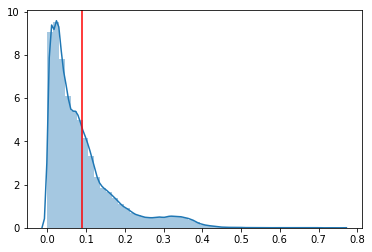

In [172]:
sns.distplot(logit.predict_proba(X_train)[:, 1])
plt.axvline(Y_train.mean(), c='red')

In [173]:
roc_auc_score(Y_train, logit.predict_proba(X_train)[:, 1])

0.7820578338368105

In [174]:
confusion_matrix(Y_train, logit.predict_proba(X_train)[:, 1]>0.5)

array([[776972,    456],
       [ 75595,    732]])

In [175]:
confusion_matrix(Y_train, logit.predict_proba(X_train)[:, 1]>Y_train.mean())

array([[530490, 246938],
       [ 18517,  57810]])

In [158]:
precision_score(Y_train, logit.predict_proba(X_train)[:, 1]>Y_train.mean())
recall_score(Y_train, logit.predict_proba(X_train)[:, 1]>Y_train.mean())

0.19257190130254648

0.7532852070695822

In [182]:
X_holdout_s = scale.transform(X_holdout)
roc_auc_score(Y_holdout, logit.predict_proba(X_holdout_s)[:, 1])

0.525266733910376

In [181]:
confusion_matrix(Y_holdout, logit.predict_proba(X_holdout_s)[:, 1] > Y_train.mean())

array([[ 62948, 253244],
       [  2714,  25562]])

In [176]:
precision_score(Y_holdout, logit.predict_proba(X_holdout_s)[:, 1] > Y_train.mean())
recall_score(Y_holdout, logit.predict_proba(X_holdout_s)[:, 1] > Y_train.mean())

0.10571705926214248

0.7972485500070732

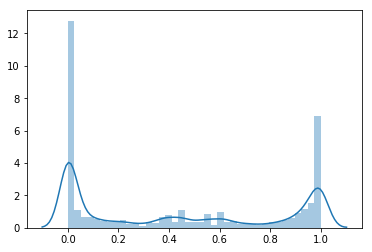

In [177]:
sns.distplot(logit.predict_proba(X_holdout_s)[:, 1])

In [178]:
pd.DataFrame({'coeff': logit.coef_.flatten(), 'abs': abs(logit.coef_.flatten())},
                 X_train.columns).sort_values(by='abs', ascending=False).nlargest(20, 'abs')

,coeff,abs
event_id_simp_103471931,2.851554,2.851554
venue_id_simp_8650,-2.575817,2.575817
venue_id_simp_13804,-2.505751,2.505751
venue_id_simp_9223,-2.311416,2.311416
venue_id_simp_424,-2.102489,2.102489
venue_id_simp_301,-2.043251,2.043251
venue_id_simp_8170,-1.983798,1.983798
event_id_simp_103482013,1.923205,1.923205
venue_id_simp_139004,-1.779379,1.779379
venue_id_simp_2101,-1.778130,1.778130


# Logistic Regression -- Getting Serious

In [377]:
# See cross-val scores using defaults parameters
cross_val_score(LogisticRegression(), X_train, Y_train, scoring = roc_scorer, cv=folds)

array([0.77367549, 0.77682868, 0.77907531, 0.7785837 , 0.78288232])

In [338]:
# See how long it takes to fit a single logistic regression
%time logit_pipe.fit(X_train, Y_train)

CPU times: user 2min 11s, sys: 6.18 s, total: 2min 18s
Wall time: 2min 19s


Pipeline(memory=None,
     steps=[('standardscaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('logisticregression', LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False))])

In [344]:
# Grid search over C values and penalty type

logit_pipe = make_pipeline(StandardScaler(), LogisticRegression())

logit_grid = {'logisticregression__C': np.ones(3)*10.0**np.arange(-3, 3, 2),
              'logisticregression__penalty': ['l1', 'l2']}

lgs = GridSearchCV(logit_pipe, logit_grid, n_jobs=3, scoring=roc_scorer, cv=folds)
print('Started at', datetime.now())
%time lgs.fit(X_train, Y_train)

Started at 2018-09-16 15:07:38.414579
CPU times: user 7min 26s, sys: 13.2 s, total: 7min 39s
Wall time: 1h 11min 13s


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=30, shuffle=True),
       error_score='raise',
       estimator=Pipeline(memory=None,
     steps=[('standardscaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('logisticregression', LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False))]),
       fit_params=None, iid=True, n_jobs=3,
       param_grid={'logisticregression__C': array([1.e-03, 1.e-01, 1.e+01]), 'logisticregression__penalty': ['l1', 'l2']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=make_scorer(roc_scorer_fun, needs_proba=True), verbose=0)

In [345]:
lgs.best_params_
lgs.best_score_

{'logisticregression__C': 0.1, 'logisticregression__penalty': 'l1'}

0.7826069664908984

In [346]:
lgs.grid_scores_

[mean: 0.76893, std: 0.00304, params: {'logisticregression__C': 0.001, 'logisticregression__penalty': 'l1'},
 mean: 0.77780, std: 0.00207, params: {'logisticregression__C': 0.001, 'logisticregression__penalty': 'l2'},
 mean: 0.78261, std: 0.00101, params: {'logisticregression__C': 0.1, 'logisticregression__penalty': 'l1'},
 mean: 0.78253, std: 0.00100, params: {'logisticregression__C': 0.1, 'logisticregression__penalty': 'l2'},
 mean: 0.78259, std: 0.00099, params: {'logisticregression__C': 10.0, 'logisticregression__penalty': 'l1'},
 mean: 0.78259, std: 0.00099, params: {'logisticregression__C': 10.0, 'logisticregression__penalty': 'l2'}]

In [347]:
logit_tuned = lgs.best_estimator_
%time logit_tuned.fit(X_train, Y_train)

Y_holdout_pred = logit_tuned.predict_proba(X_holdout)[:, 1]
roc_auc_score(Y_holdout, Y_holdout_pred)

Pipeline(memory=None,
     steps=[('standardscaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('logisticregression', LogisticRegression(C=0.1, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l1', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False))])

0.7567574225409979

In [362]:
logit_pipe.set_params(**lgs.best_params_)
logit_pipe.set_params(logisticregression__C = 1)

%time logit_pipe.fit(X_train, Y_train)

roc_scorer_fun(Y_holdout, logit_pipe.predict_proba(X_holdout))

Pipeline(memory=None,
     steps=[('standardscaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('logisticregression', LogisticRegression(C=0.1, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l1', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False))])

Pipeline(memory=None,
     steps=[('standardscaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('logisticregression', LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l1', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False))])

CPU times: user 10min 12s, sys: 9.99 s, total: 10min 22s
Wall time: 10min 36s


Pipeline(memory=None,
     steps=[('standardscaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('logisticregression', LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l1', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False))])

IndexError: too many indices for array

In [378]:
roc_scorer_fun(Y_train, logit_pipe.predict_proba(X_train))
roc_scorer_fun(Y_holdout, logit_pipe.predict_proba(X_holdout))

0.7831446037183488

0.7567076318379335

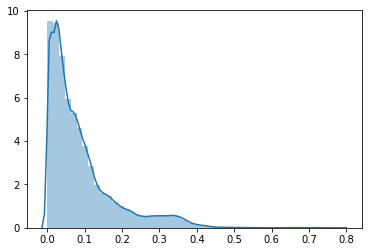

In [458]:
sns.distplot(logit_pipe.predict_proba(X_train)[:,1])

In [552]:
models.append('Logistic Regression')
AUC_training.append(roc_scorer_fun(Y_train, logit_pipe.predict_proba(X_train)))
AUC_holdout.append(roc_scorer_fun(Y_holdout, logit_pipe.predict_proba(X_holdout)))

# Naive Bayes

## Try doing Gaussian NB on the full dataset.... nope :(

In [278]:
from sklearn.naive_bayes import GaussianNB

In [279]:
gnb = GaussianNB()
gnb.fit(X_train, Y_train)

GaussianNB(priors=None)

In [282]:
roc_scorer_fun(Y_train, gnb.predict_proba(X_train))
roc_scorer_fun(Y_holdout, gnb.predict_proba(X_holdout))

0.7251924930334048

0.5281360374139772

## Bernoulli NB on the Bernoulli variables... pretty good!

In [289]:
%time bernoulli_vars = X_train.apply(lambda x: x.min() == 0 and x.max() == 1, axis=0)

CPU times: user 22.6 s, sys: 2.09 s, total: 24.7 s
Wall time: 25.7 s


In [292]:
from sklearn.naive_bayes import BernoulliNB

In [294]:
bnb = BernoulliNB()
bnb.fit(X_train.loc[:, bernoulli_vars], Y_train)

BernoulliNB(alpha=1.0, binarize=0.0, class_prior=None, fit_prior=True)

In [298]:
roc_scorer_fun(Y_train, bnb.predict_proba(X_train.loc[:, bernoulli_vars]))
roc_scorer_fun(Y_holdout, bnb.predict_proba(X_holdout.loc[:, bernoulli_vars]))

0.7080947960471119

0.6972912059564303

In [ ]:
models

## Try Gaussian NB on just the continuous variables... a little bit better!

In [322]:
gnb.fit(X_train.loc[:, ~bernoulli_vars], Y_train)

GaussianNB(priors=None)

In [323]:
roc_scorer_fun(Y_train, gnb.predict_proba(X_train.loc[:, ~bernoulli_vars]))
roc_scorer_fun(Y_holdout, gnb.predict_proba(X_holdout.loc[:, ~bernoulli_vars]))

0.7324203579193624

0.703974967872206

In [555]:
models.append('Gaussian Naive Bayes')
AUC_training.append(roc_scorer_fun(Y_train, gnb.predict_proba(X_train.loc[:, ~bernoulli_vars])))
AUC_holdout.append(roc_scorer_fun(Y_holdout, gnb.predict_proba(X_holdout.loc[:, ~bernoulli_vars])))

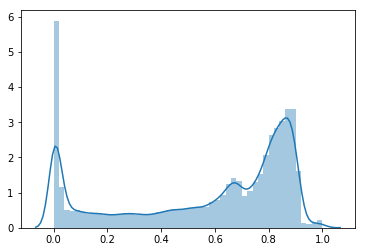

In [472]:
sns.distplot(gnb.predict_proba(X_train.loc[:, ~bernoulli_vars])[:,1])

In [469]:
ev = pd.DataFrame({'proba': pd.cut(gnb.predict_proba(X_train.loc[:, ~bernoulli_vars])[:,1], bins=10),
                   'truth': Y_train})
ev.head()

,proba,truth
0,"(0.8, 0.9]",0
1,"(0.8, 0.9]",0
2,"(0.8, 0.9]",0
3,"(0.8, 0.9]",0
4,"(0.8, 0.9]",0


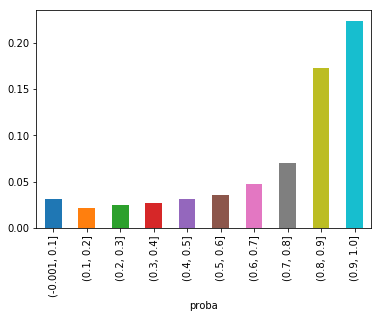

In [471]:
ev.groupby('proba').truth.mean().plot.bar()

## Ensemble... even better!

In [329]:
train_predicts_gnb = gnb.predict_proba(X_train.loc[:, ~bernoulli_vars])[:, 0]
holdout_predicts_gnb = gnb.predict_proba(X_holdout.loc[:, ~bernoulli_vars])[:, 0]

train_predicts_bnb = bnb.predict_proba(X_train.loc[:, bernoulli_vars])[:, 1]
holdout_predicts_bnb = bnb.predict_proba(X_holdout.loc[:, bernoulli_vars])[:, 1]

In [332]:
train_predicts = np.column_stack([train_predicts_bnb, train_predicts_gnb])
holdout_predicts = np.column_stack([holdout_predicts_bnb, holdout_predicts_gnb])

In [324]:
ensemble_logit = LogisticRegression()

In [333]:
ensemble_logit.fit(train_predicts, Y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [379]:
roc_scorer_fun(Y_train, ensemble_logit.predict_proba(train_predicts))
roc_scorer_fun(Y_holdout, ensemble_logit.predict_proba(holdout_predicts))

0.7538564864905166

0.7276070219006411

# Add more bernoulli variables

In [389]:
X_train_nb, X_holdout_nb, _, _ = data_fetcher.get_data()

Already have data... don't need to query again
Simplifying venues
Venues simplified
Simplifying events
Events simplified
Simplifying zones
Zones simplified
Dummying performers
Performers dummied
Concatanating dummied performers
Performers concatanated
Starting final cleanup
Done


In [868]:
X_train_nb.to_csv('X_train_nb.csv')
X_holdout_nb.to_csv('X_holdout_nb.csv')
Y_train.to_csv('Y_train.csv')
Y_holdout.to_csv('Y_holdout.csv')

In [390]:
X_train_nb.shape

(853755, 512)

In [773]:
%time bernoulli_vars = X_train_nb.apply(lambda x: x.min() == 0 and x.max() == 1, axis=0)

CPU times: user 1min 2s, sys: 3.2 s, total: 1min 6s
Wall time: 1min 8s


In [772]:
len(bernoulli_vars), len(X_train_nb.columns), len(X_train.columns)

(512, 512, 180)

In [392]:
bnb.fit(X_train_nb.loc[:, bernoulli_vars], Y_train)

BernoulliNB(alpha=1.0, binarize=0.0, class_prior=None, fit_prior=True)

In [393]:
roc_scorer_fun(Y_train, bnb.predict_proba(X_train_nb.loc[:, bernoulli_vars]))
roc_scorer_fun(Y_holdout, bnb.predict_proba(X_holdout_nb.loc[:, bernoulli_vars]))

0.7506898692018278

0.7257296104817759

In [558]:
models.append('Bernoulli Naive Bayes')
AUC_training.append(roc_scorer_fun(Y_train, bnb.predict_proba(X_train_nb.loc[:, bernoulli_vars])))
AUC_holdout.append(roc_scorer_fun(Y_holdout, bnb.predict_proba(X_holdout_nb.loc[:, bernoulli_vars])))

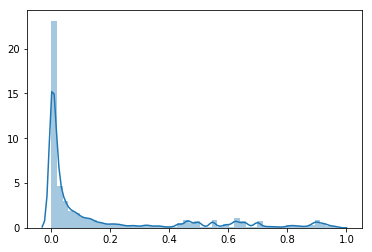

In [461]:
sns.distplot(bnb.predict_proba(X_train_nb.loc[:, bernoulli_vars])[:,1])

## Ensemble again... even better!

In [394]:
train_predicts_bnb = bnb.predict_proba(X_train_nb.loc[:, bernoulli_vars])[:, 1]
holdout_predicts_bnb = bnb.predict_proba(X_holdout_nb.loc[:, bernoulli_vars])[:, 1]

In [395]:
train_predicts = np.column_stack([train_predicts_bnb, train_predicts_gnb])
holdout_predicts = np.column_stack([holdout_predicts_bnb, holdout_predicts_gnb])

In [406]:
ensemble_logit = LogisticRegression()

In [407]:
ensemble_logit.fit(train_predicts, Y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [408]:
roc_scorer_fun(Y_train, ensemble_logit.predict_proba(train_predicts))
roc_scorer_fun(Y_holdout, ensemble_logit.predict_proba(holdout_predicts))

0.7666962021330621

0.7339791023323073

In [559]:
models.append('Ensembled Naive Bayes')
AUC_training.append(roc_scorer_fun(Y_train, ensemble_logit.predict_proba(train_predicts)))
AUC_holdout.append(roc_scorer_fun(Y_holdout, ensemble_logit.predict_proba(holdout_predicts)))

In [622]:
bernoulli_vars.value_counts()

True     497
False     15
dtype: int64

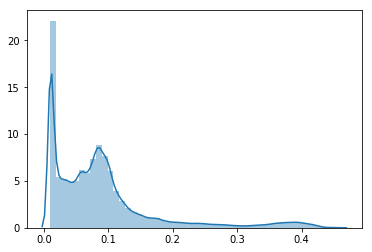

In [459]:
sns.distplot(ensemble_logit.predict_proba(train_predicts)[:, 1])

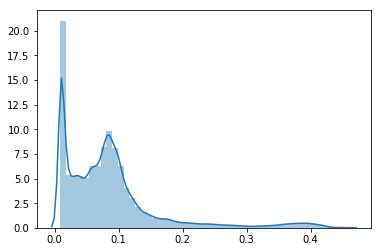

In [460]:
sns.distplot(ensemble_logit.predict_proba(holdout_predicts)[:, 1])

In [475]:
confusion_matrix(Y_holdout, ensemble_logit.predict_proba(holdout_predicts)[:,1]>Y_train.mean())

array([[213885, 102307],
       [  8857,  19419]])

In [478]:
(ensemble_logit.predict_proba(holdout_predicts)[:,1]>Y_train.mean()).sum()

121726

In [480]:
L = np.zeros([2,2])
L[0, 1] = 10 #False negative penalty
L[1, 0] = 1 #False positive penalty
L

array([[ 0., 10.],
       [ 1.,  0.]])

In [482]:
np.sum(L*confusion_matrix(Y_holdout, ensemble_logit.predict_proba(holdout_predicts)[:,1]>Y_train.mean()))

1031927.0

In [495]:
def Loss_Function(ground_truth, predictions, cutoff):
    # Set up loss matrix
    L = np.zeros([2,2])
    L[0, 1] = 1 #False positive penalty
    L[1, 0] = 10 #False negative penalty
    
    return np.sum(L*confusion_matrix(ground_truth, predictions[:,1]>cutoff))

for cutoff in np.linspace(0,1,21):
    print(cutoff, ': ', Loss_Function(Y_holdout, ensemble_logit.predict_proba(holdout_predicts), cutoff))
    
    
# Loss_Function(Y_holdout, ensemble_logit.predict_proba(holdout_predicts), 0.5)
# Loss_Function(Y_holdout, ensemble_logit.predict_proba(holdout_predicts), 0.1)

0.0 :  316192.0
0.05 :  240236.0
0.1 :  183130.0
0.15000000000000002 :  203234.0
0.2 :  212056.0
0.25 :  227192.0
0.30000000000000004 :  241603.0
0.35000000000000003 :  249029.0
0.4 :  274477.0
0.45 :  282151.0
0.5 :  282760.0
0.55 :  282760.0
0.6000000000000001 :  282760.0
0.65 :  282760.0
0.7000000000000001 :  282760.0
0.75 :  282760.0
0.8 :  282760.0
0.8500000000000001 :  282760.0
0.9 :  282760.0
0.9500000000000001 :  282760.0
1.0 :  282760.0


In [496]:
confusion_matrix(Y_holdout, ensemble_logit.predict_proba(holdout_predicts)[:,1]>0.1)

array([[241342,  74850],
       [ 10828,  17448]])

# Random forest

In [209]:
from sklearn.ensemble import RandomForestClassifier

In [366]:
%time cross_val_score(RandomForestClassifier(n_jobs=3), X_train, Y_train, scoring = roc_scorer, cv = folds)

CPU times: user 1min 52s, sys: 9.91 s, total: 2min 1s
Wall time: 1min 13s


array([0.94219655, 0.94014853, 0.9400381 , 0.94368689, 0.9397612 ])

In [368]:
rf = RandomForestClassifier(n_jobs=3)
%time rf.fit(X_train, Y_train)
roc_scorer_fun(Y_train, rf.predict_proba(X_train))
roc_scorer_fun(Y_holdout, rf.predict_proba(X_holdout))

CPU times: user 24 s, sys: 1.85 s, total: 25.9 s
Wall time: 15 s


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=3,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

0.9995730135906175

0.8140742471055046

In [369]:
rf.set_params(n_estimators = 100, max_features = 25, max_depth = 2)
%time rf.fit(X_train, Y_train)
roc_scorer_fun(Y_train, rf.predict_proba(X_train))
roc_scorer_fun(Y_holdout, rf.predict_proba(X_holdout))

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=2, max_features=25, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=3,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

CPU times: user 46.6 s, sys: 8.37 s, total: 54.9 s
Wall time: 20.9 s


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=2, max_features=25, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=3,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

0.7793680506734022

0.7495122294863623

In [570]:
rf.set_params(n_estimators = 100, max_features = 25, max_depth = 5)
%time rf.fit(X_train, Y_train)
roc_auc_score(Y_train, rf.predict_proba(X_train)[:, 1])
roc_auc_score(Y_holdout, rf.predict_proba(X_holdout)[:, 1])

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=5, max_features=25, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=150,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=3,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

CPU times: user 1min 29s, sys: 6.96 s, total: 1min 36s
Wall time: 38.8 s


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=5, max_features=25, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=150,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=3,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

0.8188954185370885

0.7884152713039521

In [571]:
models.append('Random Forest')
AUC_training.append(roc_auc_score(Y_train, rf.predict_proba(X_train)[:, 1]))
AUC_holdout.append(roc_auc_score(Y_holdout, rf.predict_proba(X_holdout)[:, 1]))

In [372]:
rf.set_params(max_features = 5, max_depth=None)
%time rf.fit(X_train, Y_train)
roc_auc_score(Y_train, rf.predict_proba(X_train)[:, 1])
roc_auc_score(Y_holdout, rf.predict_proba(X_holdout)[:, 1])

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features=5, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=3,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

CPU times: user 2min 26s, sys: 7.43 s, total: 2min 34s
Wall time: 58.8 s


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features=5, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=3,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

0.9998325612603959

0.8575280190478677

In [420]:
rf.set_params(min_samples_split = 150)
%time rf.fit(X_train, Y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features=5, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=150,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=3,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

CPU times: user 1min 55s, sys: 5.88 s, total: 2min
Wall time: 46.2 s


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features=5, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=150,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=3,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

0.9540217233855132

0.8691369439177035

In [374]:
pd.Series(rf.predict(X_train)).value_counts()/len(X_train)
pd.Series(rf.predict(X_holdout)).value_counts()/len(X_holdout)

0    0.942897
1    0.057103
dtype: float64

0    0.960557
1    0.039443
dtype: float64

In [375]:
pd.Series(rf.feature_importances_, X_train.columns).sort_values(ascending=False).nlargest(15)

price_curr                  0.160320
price_over_min              0.156026
quantity                    0.140524
days_until_show             0.088294
totallistings               0.075947
minprice                    0.057780
ticket_splits_option        0.032995
popularity                  0.025029
zone_name_simp_Mezzanine    0.014594
zone_name_simp_Orchestra    0.014105
event_perf_count            0.013890
category_Musicals           0.013591
venue_id_simp_3961          0.012604
full_listing                0.012540
performer_id_100281836      0.010491
dtype: float64

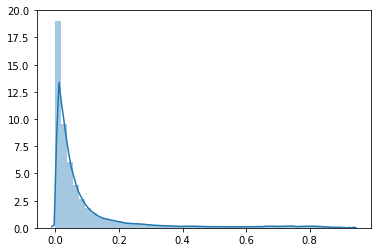

In [450]:
sns.distplot(rf.predict_proba(X_train)[:, 1])

In [428]:
rf_param_grid = {'n_estimators': [50, 100], 'max_depth': [10, None],
                 'max_features': [5, 10, 20], 'min_samples_split': [2, 100, 500]}

rfgs = GridSearchCV(rf, rf_param_grid, scoring = roc_scorer, n_jobs=3, cv = folds, verbose=10)

%time rfgs.fit(X_train, Y_train)

Fitting 5 folds for each of 36 candidates, totalling 180 fits
[CV] max_depth=10, max_features=5, min_samples_split=2, n_estimators=50 
[CV] max_depth=10, max_features=5, min_samples_split=2, n_estimators=50 
[CV] max_depth=10, max_features=5, min_samples_split=2, n_estimators=50 
[CV]  max_depth=10, max_features=5, min_samples_split=2, n_estimators=50, score=0.8462155438502112, total=  29.8s
[CV] max_depth=10, max_features=5, min_samples_split=2, n_estimators=50 
[CV]  max_depth=10, max_features=5, min_samples_split=2, n_estimators=50, score=0.8445348833835046, total=  30.9s
[CV] max_depth=10, max_features=5, min_samples_split=2, n_estimators=50 


[Parallel(n_jobs=3)]: Done   2 tasks      | elapsed:   46.5s


[CV]  max_depth=10, max_features=5, min_samples_split=2, n_estimators=50, score=0.8439459243329218, total=  31.3s
[CV] max_depth=10, max_features=5, min_samples_split=2, n_estimators=100 
[CV]  max_depth=10, max_features=5, min_samples_split=2, n_estimators=50, score=0.8494055203216975, total=  28.8s
[CV] max_depth=10, max_features=5, min_samples_split=2, n_estimators=100 
[CV]  max_depth=10, max_features=5, min_samples_split=2, n_estimators=50, score=0.8463557859660854, total=  29.6s
[CV] max_depth=10, max_features=5, min_samples_split=2, n_estimators=100 
[CV]  max_depth=10, max_features=5, min_samples_split=2, n_estimators=100, score=0.8482124509113873, total=  40.0s
[CV] max_depth=10, max_features=5, min_samples_split=2, n_estimators=100 
[CV]  max_depth=10, max_features=5, min_samples_split=2, n_estimators=100, score=0.8469340004550865, total=  53.0s
[CV] max_depth=10, max_features=5, min_samples_split=2, n_estimators=100 


[Parallel(n_jobs=3)]: Done   7 tasks      | elapsed:  2.7min


[CV]  max_depth=10, max_features=5, min_samples_split=2, n_estimators=100, score=0.845287456176576, total=  53.0s
[CV] max_depth=10, max_features=5, min_samples_split=100, n_estimators=50 
[CV]  max_depth=10, max_features=5, min_samples_split=2, n_estimators=100, score=0.8459239889267589, total=  50.0s
[CV] max_depth=10, max_features=5, min_samples_split=100, n_estimators=50 
[CV]  max_depth=10, max_features=5, min_samples_split=100, n_estimators=50, score=0.8378944714408598, total=  29.8s
[CV] max_depth=10, max_features=5, min_samples_split=100, n_estimators=50 
[CV]  max_depth=10, max_features=5, min_samples_split=2, n_estimators=100, score=0.8476829538619903, total=  37.6s
[CV] max_depth=10, max_features=5, min_samples_split=100, n_estimators=50 
[CV]  max_depth=10, max_features=5, min_samples_split=100, n_estimators=50, score=0.843402913076363, total=  29.6s
[CV] max_depth=10, max_features=5, min_samples_split=100, n_estimators=50 


[Parallel(n_jobs=3)]: Done  12 tasks      | elapsed:  3.6min


[CV]  max_depth=10, max_features=5, min_samples_split=100, n_estimators=50, score=0.8414409358956023, total=  24.6s
[CV] max_depth=10, max_features=5, min_samples_split=100, n_estimators=100 
[CV]  max_depth=10, max_features=5, min_samples_split=100, n_estimators=50, score=0.8392863621970206, total=  27.6s
[CV] max_depth=10, max_features=5, min_samples_split=100, n_estimators=100 
[CV]  max_depth=10, max_features=5, min_samples_split=100, n_estimators=50, score=0.8444719823197052, total=  27.1s
[CV] max_depth=10, max_features=5, min_samples_split=100, n_estimators=100 
[CV]  max_depth=10, max_features=5, min_samples_split=100, n_estimators=100, score=0.8433753015835183, total=  39.0s
[CV] max_depth=10, max_features=5, min_samples_split=100, n_estimators=100 
[CV]  max_depth=10, max_features=5, min_samples_split=100, n_estimators=100, score=0.8431621824824301, total=  42.1s
[CV] max_depth=10, max_features=5, min_samples_split=100, n_estimators=100 
[CV]  max_depth=10, max_features=5, mi

[Parallel(n_jobs=3)]: Done  19 tasks      | elapsed:  5.9min


[CV]  max_depth=10, max_features=5, min_samples_split=100, n_estimators=100, score=0.8462220531361243, total=  41.9s
[CV] max_depth=10, max_features=5, min_samples_split=500, n_estimators=50 
[CV]  max_depth=10, max_features=5, min_samples_split=500, n_estimators=50, score=0.8366077924307525, total=  28.5s
[CV]  max_depth=10, max_features=5, min_samples_split=500, n_estimators=50, score=0.8347529820576577, total=  28.2s
[CV] max_depth=10, max_features=5, min_samples_split=500, n_estimators=50 
[CV] max_depth=10, max_features=5, min_samples_split=500, n_estimators=100 
[CV]  max_depth=10, max_features=5, min_samples_split=500, n_estimators=50, score=0.8365160908713087, total=  28.2s
[CV] max_depth=10, max_features=5, min_samples_split=500, n_estimators=100 
[CV]  max_depth=10, max_features=5, min_samples_split=500, n_estimators=50, score=0.837069185405838, total=  29.1s
[CV] max_depth=10, max_features=5, min_samples_split=500, n_estimators=100 
[CV]  max_depth=10, max_features=5, min_sa

[Parallel(n_jobs=3)]: Done  26 tasks      | elapsed:  7.5min


[CV]  max_depth=10, max_features=5, min_samples_split=500, n_estimators=100, score=0.837862420159835, total=  40.4s
[CV] max_depth=10, max_features=5, min_samples_split=500, n_estimators=100 
[CV]  max_depth=10, max_features=5, min_samples_split=500, n_estimators=100, score=0.8378234379117545, total=  38.0s
[CV] max_depth=10, max_features=10, min_samples_split=2, n_estimators=50 
[CV]  max_depth=10, max_features=5, min_samples_split=500, n_estimators=100, score=0.8394232629511573, total=  44.5s
[CV] max_depth=10, max_features=10, min_samples_split=2, n_estimators=50 
[CV]  max_depth=10, max_features=5, min_samples_split=500, n_estimators=100, score=0.8398019691372602, total=  43.9s
[CV] max_depth=10, max_features=10, min_samples_split=2, n_estimators=50 
[CV]  max_depth=10, max_features=10, min_samples_split=2, n_estimators=50, score=0.8576692705127343, total=  28.7s
[CV] max_depth=10, max_features=10, min_samples_split=2, n_estimators=50 
[CV]  max_depth=10, max_features=10, min_sampl

[Parallel(n_jobs=3)]: Done  35 tasks      | elapsed: 10.1min


[CV]  max_depth=10, max_features=10, min_samples_split=2, n_estimators=100, score=0.8595066451594848, total=  46.4s
[CV] max_depth=10, max_features=10, min_samples_split=2, n_estimators=100 
[CV]  max_depth=10, max_features=10, min_samples_split=2, n_estimators=100, score=0.8592933019309295, total=  48.6s
[CV] max_depth=10, max_features=10, min_samples_split=2, n_estimators=100 
[CV]  max_depth=10, max_features=10, min_samples_split=2, n_estimators=100, score=0.8577695025273271, total=  51.7s
[CV] max_depth=10, max_features=10, min_samples_split=100, n_estimators=50 
[CV]  max_depth=10, max_features=10, min_samples_split=2, n_estimators=100, score=0.860898765873603, total=  50.7s
[CV] max_depth=10, max_features=10, min_samples_split=100, n_estimators=50 
[CV]  max_depth=10, max_features=10, min_samples_split=100, n_estimators=50, score=0.8521270867398356, total=  35.6s
[CV] max_depth=10, max_features=10, min_samples_split=100, n_estimators=50 
[CV]  max_depth=10, max_features=10, min_s

[Parallel(n_jobs=3)]: Done  44 tasks      | elapsed: 12.9min


[CV]  max_depth=10, max_features=10, min_samples_split=100, n_estimators=50, score=0.8526743699945631, total=  33.8s
[CV] max_depth=10, max_features=10, min_samples_split=100, n_estimators=100 
[CV]  max_depth=10, max_features=10, min_samples_split=100, n_estimators=100, score=0.8539094783268225, total=  52.7s
[CV] max_depth=10, max_features=10, min_samples_split=100, n_estimators=100 
[CV]  max_depth=10, max_features=10, min_samples_split=100, n_estimators=100, score=0.8519683000126594, total=  53.1s
[CV] max_depth=10, max_features=10, min_samples_split=100, n_estimators=100 
[CV]  max_depth=10, max_features=10, min_samples_split=100, n_estimators=100, score=0.8532955165220801, total=  55.5s
[CV] max_depth=10, max_features=10, min_samples_split=500, n_estimators=50 
[CV]  max_depth=10, max_features=10, min_samples_split=100, n_estimators=100, score=0.8547766110502306, total=  53.2s
[CV] max_depth=10, max_features=10, min_samples_split=500, n_estimators=50 
[CV]  max_depth=10, max_feat

[Parallel(n_jobs=3)]: Done  55 tasks      | elapsed: 16.8min


[CV]  max_depth=10, max_features=10, min_samples_split=500, n_estimators=100, score=0.8486835786434018, total=  52.3s
[CV] max_depth=10, max_features=10, min_samples_split=500, n_estimators=100 
[CV]  max_depth=10, max_features=10, min_samples_split=500, n_estimators=100, score=0.8459297004415576, total=  52.0s
[CV] max_depth=10, max_features=10, min_samples_split=500, n_estimators=100 
[CV]  max_depth=10, max_features=10, min_samples_split=500, n_estimators=100, score=0.8466039706807069, total=  45.9s
[CV] max_depth=10, max_features=20, min_samples_split=2, n_estimators=50 
[CV]  max_depth=10, max_features=10, min_samples_split=500, n_estimators=100, score=0.8487048510371502, total=  54.6s
[CV] max_depth=10, max_features=20, min_samples_split=2, n_estimators=50 
[CV]  max_depth=10, max_features=10, min_samples_split=500, n_estimators=100, score=0.8502435415968215, total=  54.0s
[CV] max_depth=10, max_features=20, min_samples_split=2, n_estimators=50 
[CV]  max_depth=10, max_features=2

[Parallel(n_jobs=3)]: Done  66 tasks      | elapsed: 20.7min


[CV]  max_depth=10, max_features=20, min_samples_split=2, n_estimators=100, score=0.8722127874716399, total= 1.2min
[CV] max_depth=10, max_features=20, min_samples_split=2, n_estimators=100 
[CV]  max_depth=10, max_features=20, min_samples_split=2, n_estimators=100, score=0.870668691953898, total= 1.3min
[CV] max_depth=10, max_features=20, min_samples_split=100, n_estimators=50 
[CV]  max_depth=10, max_features=20, min_samples_split=2, n_estimators=100, score=0.8725957398329525, total= 1.3min
[CV] max_depth=10, max_features=20, min_samples_split=100, n_estimators=50 
[CV]  max_depth=10, max_features=20, min_samples_split=2, n_estimators=100, score=0.8740078728961747, total= 1.2min
[CV] max_depth=10, max_features=20, min_samples_split=100, n_estimators=50 
[CV]  max_depth=10, max_features=20, min_samples_split=100, n_estimators=50, score=0.869238082627334, total=  49.9s
[CV] max_depth=10, max_features=20, min_samples_split=100, n_estimators=50 
[CV]  max_depth=10, max_features=20, min_s

[Parallel(n_jobs=3)]: Done  79 tasks      | elapsed: 27.1min


[CV]  max_depth=10, max_features=20, min_samples_split=100, n_estimators=100, score=0.8688508441423541, total= 1.3min
[CV] max_depth=10, max_features=20, min_samples_split=500, n_estimators=50 
[CV]  max_depth=10, max_features=20, min_samples_split=100, n_estimators=100, score=0.8699532120266393, total= 1.3min
[CV] max_depth=10, max_features=20, min_samples_split=500, n_estimators=50 
[CV]  max_depth=10, max_features=20, min_samples_split=500, n_estimators=50, score=0.8613090660323821, total=  48.7s
[CV] max_depth=10, max_features=20, min_samples_split=500, n_estimators=50 
[CV]  max_depth=10, max_features=20, min_samples_split=500, n_estimators=50, score=0.8598822042841747, total=  48.7s
[CV] max_depth=10, max_features=20, min_samples_split=500, n_estimators=100 
[CV]  max_depth=10, max_features=20, min_samples_split=500, n_estimators=50, score=0.8645931232935844, total=  48.2s
[CV] max_depth=10, max_features=20, min_samples_split=500, n_estimators=100 
[CV]  max_depth=10, max_feature

[Parallel(n_jobs=3)]: Done  92 tasks      | elapsed: 32.5min


[CV] max_depth=None, max_features=5, min_samples_split=2, n_estimators=50 
[CV]  max_depth=None, max_features=5, min_samples_split=2, n_estimators=50, score=0.9547792303261092, total=  52.3s
[CV] max_depth=None, max_features=5, min_samples_split=2, n_estimators=100 
[CV]  max_depth=None, max_features=5, min_samples_split=2, n_estimators=50, score=0.956734535232418, total=  45.1s
[CV] max_depth=None, max_features=5, min_samples_split=2, n_estimators=100 
[CV]  max_depth=None, max_features=5, min_samples_split=2, n_estimators=50, score=0.9572091923603987, total=  54.3s
[CV] max_depth=None, max_features=5, min_samples_split=2, n_estimators=100 
[CV]  max_depth=None, max_features=5, min_samples_split=2, n_estimators=100, score=0.9593421823199462, total= 1.5min
[CV] max_depth=None, max_features=5, min_samples_split=2, n_estimators=100 
[CV]  max_depth=None, max_features=5, min_samples_split=2, n_estimators=100, score=0.9582082435248536, total= 1.5min
[CV] max_depth=None, max_features=5, min

[Parallel(n_jobs=3)]: Done 107 tasks      | elapsed: 40.0min


[CV]  max_depth=None, max_features=5, min_samples_split=100, n_estimators=100, score=0.9392836087850056, total= 1.3min
[CV] max_depth=None, max_features=5, min_samples_split=500, n_estimators=50 
[CV]  max_depth=None, max_features=5, min_samples_split=100, n_estimators=100, score=0.9410584696568932, total= 1.4min
[CV] max_depth=None, max_features=5, min_samples_split=500, n_estimators=50 
[CV]  max_depth=None, max_features=5, min_samples_split=500, n_estimators=50, score=0.9044611749120093, total=  53.9s
[CV] max_depth=None, max_features=5, min_samples_split=500, n_estimators=50 
[CV]  max_depth=None, max_features=5, min_samples_split=100, n_estimators=100, score=0.9418585516799652, total= 1.3min
[CV] max_depth=None, max_features=5, min_samples_split=500, n_estimators=50 
[CV]  max_depth=None, max_features=5, min_samples_split=500, n_estimators=50, score=0.9038061569126271, total=  45.1s
[CV] max_depth=None, max_features=5, min_samples_split=500, n_estimators=50 
[CV]  max_depth=None, 

[Parallel(n_jobs=3)]: Done 122 tasks      | elapsed: 46.9min


[CV]  max_depth=None, max_features=10, min_samples_split=2, n_estimators=50, score=0.9568490040161427, total=  59.2s
[CV] max_depth=None, max_features=10, min_samples_split=2, n_estimators=100 
[CV]  max_depth=None, max_features=10, min_samples_split=2, n_estimators=50, score=0.9581620059107128, total=  50.2s
[CV] max_depth=None, max_features=10, min_samples_split=2, n_estimators=100 
[CV]  max_depth=None, max_features=10, min_samples_split=2, n_estimators=50, score=0.9590935896502373, total= 1.0min
[CV] max_depth=None, max_features=10, min_samples_split=2, n_estimators=100 
[CV]  max_depth=None, max_features=10, min_samples_split=2, n_estimators=100, score=0.9615078681067961, total= 1.7min
[CV] max_depth=None, max_features=10, min_samples_split=2, n_estimators=100 
[CV]  max_depth=None, max_features=10, min_samples_split=2, n_estimators=100, score=0.9609211978206338, total= 1.8min
[CV] max_depth=None, max_features=10, min_samples_split=2, n_estimators=100 
[CV]  max_depth=None, max_fe

[Parallel(n_jobs=3)]: Done 139 tasks      | elapsed: 57.1min


[CV]  max_depth=None, max_features=10, min_samples_split=500, n_estimators=50, score=0.911870256438003, total= 1.1min
[CV] max_depth=None, max_features=10, min_samples_split=500, n_estimators=50 
[CV]  max_depth=None, max_features=10, min_samples_split=100, n_estimators=100, score=0.9451751087573038, total= 1.6min
[CV] max_depth=None, max_features=10, min_samples_split=500, n_estimators=50 
[CV]  max_depth=None, max_features=10, min_samples_split=500, n_estimators=50, score=0.911106674800932, total=  52.6s
[CV] max_depth=None, max_features=10, min_samples_split=500, n_estimators=50 
[CV]  max_depth=None, max_features=10, min_samples_split=500, n_estimators=50, score=0.9094310320483291, total=  54.1s
[CV] max_depth=None, max_features=10, min_samples_split=500, n_estimators=100 
[CV]  max_depth=None, max_features=10, min_samples_split=500, n_estimators=50, score=0.9121692588307704, total=  52.8s
[CV] max_depth=None, max_features=10, min_samples_split=500, n_estimators=100 
[CV]  max_dept

[Parallel(n_jobs=3)]: Done 156 tasks      | elapsed: 66.5min


[CV] max_depth=None, max_features=20, min_samples_split=2, n_estimators=100 
[CV]  max_depth=None, max_features=20, min_samples_split=2, n_estimators=100, score=0.9645552279560953, total= 2.4min
[CV] max_depth=None, max_features=20, min_samples_split=2, n_estimators=100 
[CV]  max_depth=None, max_features=20, min_samples_split=2, n_estimators=100, score=0.9637721607436774, total= 2.4min
[CV] max_depth=None, max_features=20, min_samples_split=100, n_estimators=50 
[CV]  max_depth=None, max_features=20, min_samples_split=2, n_estimators=100, score=0.9659679564617084, total= 2.4min
[CV] max_depth=None, max_features=20, min_samples_split=100, n_estimators=50 
[CV]  max_depth=None, max_features=20, min_samples_split=100, n_estimators=50, score=0.9511488665691148, total= 1.4min
[CV] max_depth=None, max_features=20, min_samples_split=100, n_estimators=50 
[CV]  max_depth=None, max_features=20, min_samples_split=2, n_estimators=100, score=0.9660308898307811, total= 2.3min
[CV] max_depth=None, 

[Parallel(n_jobs=3)]: Done 175 tasks      | elapsed: 79.5min


[CV]  max_depth=None, max_features=20, min_samples_split=500, n_estimators=100, score=0.9213457685650102, total= 2.1min
[CV] max_depth=None, max_features=20, min_samples_split=500, n_estimators=100 
[CV]  max_depth=None, max_features=20, min_samples_split=500, n_estimators=100, score=0.9199627127221807, total= 2.2min
[CV] max_depth=None, max_features=20, min_samples_split=500, n_estimators=100 
[CV]  max_depth=None, max_features=20, min_samples_split=500, n_estimators=100, score=0.9192292405365846, total= 2.0min
[CV]  max_depth=None, max_features=20, min_samples_split=500, n_estimators=100, score=0.9216799612711895, total= 2.0min
[CV]  max_depth=None, max_features=20, min_samples_split=500, n_estimators=100, score=0.9223398846635869, total= 1.9min


[Parallel(n_jobs=3)]: Done 180 out of 180 | elapsed: 82.8min finished


CPU times: user 5min 43s, sys: 9.42 s, total: 5min 53s
Wall time: 1h 24min 2s


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=30, shuffle=True),
       error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features=5, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=150,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=3,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params=None, iid=True, n_jobs=3,
       param_grid={'n_estimators': [50, 100], 'max_depth': [10, None], 'max_features': [5, 10, 20], 'min_samples_split': [2, 100, 500]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=make_scorer(roc_scorer_fun, needs_proba=True), verbose=10)

In [429]:
rfgs.best_params_
rfgs.best_score_

{'max_depth': None,
 'max_features': 20,
 'min_samples_split': 2,
 'n_estimators': 100}

0.965051516556883

In [505]:
sorted(rfgs.grid_scores_, key=lambda x: x.mean_validation_score, reverse=True)

[mean: 0.96542, std: 0.00117, params: {'max_depth': None, 'max_features': 20, 'min_samples_split': 2, 'n_estimators': 100},
 mean: 0.96267, std: 0.00076, params: {'max_depth': None, 'max_features': 20, 'min_samples_split': 2, 'n_estimators': 50},
 mean: 0.96126, std: 0.00107, params: {'max_depth': None, 'max_features': 10, 'min_samples_split': 2, 'n_estimators': 100},
 mean: 0.95920, std: 0.00079, params: {'max_depth': None, 'max_features': 5, 'min_samples_split': 2, 'n_estimators': 100},
 mean: 0.95802, std: 0.00119, params: {'max_depth': None, 'max_features': 10, 'min_samples_split': 2, 'n_estimators': 50},
 mean: 0.95599, std: 0.00082, params: {'max_depth': None, 'max_features': 5, 'min_samples_split': 2, 'n_estimators': 50},
 mean: 0.95056, std: 0.00099, params: {'max_depth': None, 'max_features': 20, 'min_samples_split': 100, 'n_estimators': 100},
 mean: 0.95005, std: 0.00132, params: {'max_depth': None, 'max_features': 20, 'min_samples_split': 100, 'n_estimators': 50},
 mean: 0.9

In [624]:
rfgs_df = pd.DataFrame(rfgs.grid_scores_).sort_values(by='mean_validation_score', ascending=False)
rfgs_df.head()

,parameters,mean_validation_score,cv_validation_scores
31,"{'max_depth': None, 'max_features': 20, 'min_s...",0.965416,"[0.9658657084181631, 0.9644230475184996, 0.963..."
30,"{'max_depth': None, 'max_features': 20, 'min_s...",0.962673,"[0.9633017352728734, 0.9623758489078483, 0.961..."
25,"{'max_depth': None, 'max_features': 10, 'min_s...",0.961261,"[0.9610755670881176, 0.9602809526439913, 0.960..."
19,"{'max_depth': None, 'max_features': 5, 'min_sa...",0.959196,"[0.9591606489719672, 0.958460458966306, 0.9581..."
24,"{'max_depth': None, 'max_features': 10, 'min_s...",0.958015,"[0.9590838109564086, 0.9571350120977182, 0.956..."


In [645]:
rf_i = RandomForestClassifier(n_jobs=3)

rfgs_df['training_AUC'], rfgs_df['holdout_AUC'] = np.NaN, np.NaN

for i in range(0, len(rfgs_df), 5):
    params = rfgs_df.iloc[i, 0]
    print(i, params)
    _ = rf_i.set_params(**params)
    %time _ = rf_i.fit(X_train, Y_train)
    
    training_AUC = roc_scorer_fun(Y_train, rf_i.predict_proba(X_train))
    holdout_AUC = roc_scorer_fun(Y_holdout, rf_i.predict_proba(X_holdout))
    
    print('TRAINING', training_AUC)
    print('HOLDOUT', holdout_AUC)
    
    rfgs_df.iloc[i, 3] = training_AUC
    rfgs_df.iloc[i, 4] = holdout_AUC

0 {'max_depth': None, 'max_features': 20, 'min_samples_split': 2, 'n_estimators': 100}
CPU times: user 3min 40s, sys: 7.59 s, total: 3min 48s
Wall time: 1min 21s
TRAINING 0.9998437259130719
HOLDOUT 0.8617461282596466
5 {'max_depth': None, 'max_features': 5, 'min_samples_split': 2, 'n_estimators': 50}
CPU times: user 1min 17s, sys: 4.86 s, total: 1min 22s
Wall time: 30.6 s
TRAINING 0.9998161159518907
HOLDOUT 0.8481057117003131
10 {'max_depth': None, 'max_features': 5, 'min_samples_split': 100, 'n_estimators': 100}
CPU times: user 2min 1s, sys: 7.94 s, total: 2min 9s
Wall time: 43.7 s
TRAINING 0.9643301984103325
HOLDOUT 0.8719621035144217
15 {'max_depth': None, 'max_features': 10, 'min_samples_split': 500, 'n_estimators': 50}
CPU times: user 1min 14s, sys: 3.69 s, total: 1min 18s
Wall time: 31.3 s
TRAINING 0.9248139496051679
HOLDOUT 0.8599669130560194
20 {'max_depth': 10, 'max_features': 20, 'min_samples_split': 100, 'n_estimators': 100}
CPU times: user 2min 2s, sys: 7.52 s, total: 2min 

In [652]:
rfgs_df = rfgs_df.reset_index()
rfgs_df.head()

,index,parameters,mean_validation_score,cv_validation_scores,training_AUC,holdout_AUC
0,31,"{'max_depth': None, 'max_features': 20, 'min_s...",0.965416,"[0.9658657084181631, 0.9644230475184996, 0.963...",0.999844,0.861746
1,30,"{'max_depth': None, 'max_features': 20, 'min_s...",0.962673,"[0.9633017352728734, 0.9623758489078483, 0.961...",NaN,NaN
2,25,"{'max_depth': None, 'max_features': 10, 'min_s...",0.961261,"[0.9610755670881176, 0.9602809526439913, 0.960...",NaN,NaN
3,19,"{'max_depth': None, 'max_features': 5, 'min_sa...",0.959196,"[0.9591606489719672, 0.958460458966306, 0.9581...",NaN,NaN
4,24,"{'max_depth': None, 'max_features': 10, 'min_s...",0.958015,"[0.9590838109564086, 0.9571350120977182, 0.956...",NaN,NaN


In [679]:
rfgs_df = rfgs_df.rename(index=str, columns={'mean_validation_score': 'Cross Validation',
                                   'training_AUC': 'Training', 'holdout_AUC': 'Holdout'})

In [680]:
rfgs_df2 = rfgs_df[rfgs_df['Training'].notnull()].melt(id_vars=['parameters', 'cv_validation_scores', 'index'])
rfgs_df2.head()

,parameters,cv_validation_scores,index,variable,value
0,"{'max_depth': None, 'max_features': 20, 'min_s...","[0.9658657084181631, 0.9644230475184996, 0.963...",31,Cross Validation,0.965416
1,"{'max_depth': None, 'max_features': 5, 'min_sa...","[0.957163266693154, 0.9553151109675565, 0.9548...",18,Cross Validation,0.955991
2,"{'max_depth': None, 'max_features': 5, 'min_sa...","[0.9406871752606807, 0.9408243395853735, 0.939...",21,Cross Validation,0.941063
3,"{'max_depth': None, 'max_features': 10, 'min_s...","[0.9118057587038397, 0.9117033109654739, 0.909...",28,Cross Validation,0.911395
4,"{'max_depth': 10, 'max_features': 20, 'min_sam...","[0.8711177406901793, 0.8690443593992866, 0.868...",15,Cross Validation,0.870562


In [681]:
order_rfgs = rfgs_df[rfgs_df['Training'].notnull()].sort_values('Training', ascending=False)['index'].tolist()

([], <a list of 0 Text xticklabel objects>)

Text(0.5,0,'')

Text(0,0.5,'AUC')

(0.5, 1)

Text(0.5,1,'Random Forest Model Performance')

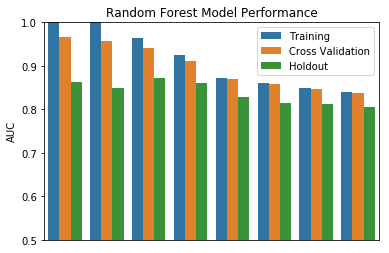

In [691]:
sns.barplot(data = rfgs_df2, x = 'index', y = 'value', hue = 'variable', order = order_rfgs,
            hue_order = ['Training', 'Cross Validation', 'Holdout'])
plt.xticks([])
plt.xlabel('')
plt.ylabel('AUC')
plt.legend(title='')
plt.ylim(0.5, 1)
plt.title('Random Forest Model Performance')
plt.savefig('figures/random_forest_models.png', dpi=200, bbox='tight', figsize=(4,4))

In [702]:
rf_not_overfit_proba = rf.predict_proba(X_train)[:,1]
rf_overfit_proba = rf_grid_tuned.predict_proba(X_train)[:,1]

[]

[]

Text(0.5,0,'Predicted Probability')

Text(0.5,1,'Predicted Probability Distributions (Training)')

Text(0,0.5,'Observation Density')

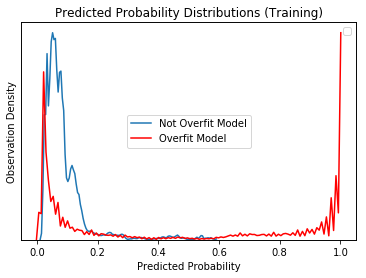

In [726]:
fig, ax = plt.subplots(1)
nof = sns.distplot(rf_not_overfit_proba, hist=False, label='Not Overfit Model', ax=ax)
ax2 = ax.twinx()
of = sns.distplot(rf_overfit_proba, ax=ax2, hist=False, label='Overfit Model', color='r')

lines0, labels0 = nof.get_legend_handles_labels()
lines1, labels1 = of.get_legend_handles_labels()
ax.legend(lines0 + lines1, labels0 + labels1, loc=10)
ax2.legend('')

ax.set_yticks([])
ax2.set_yticks([])
ax.set_xlabel('Predicted Probability')
ax.set_title('Predicted Probability Distributions (Training)')
ax.set_ylabel('Observation Density')

plt.savefig('figures/random_forest_probability_dists.png', dpi=200, bbox='tight', figsize=(4,4))

([<matplotlib.lines.Line2D at 0x19988c908>], ['Not Overfit Model'])

In [623]:
rfgs.

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=5, max_features=25, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=150,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=3,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [440]:
rf_grid_tuned = rfgs.best_estimator_
rf_grid_tuned.fit(X_train, Y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features=20, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=3,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [442]:
roc_scorer_fun(Y_train, rf_grid_tuned.predict_proba(X_train))
roc_scorer_fun(Y_holdout, rf_grid_tuned.predict_proba(X_holdout))

0.9998432580147523

0.8625327312403368

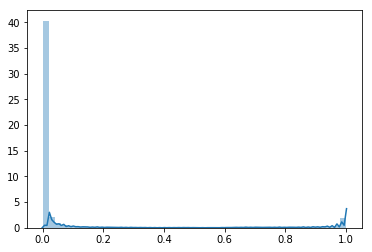

In [447]:
sns.distplot(rf_grid_tuned.predict_proba(X_train)[:, 1])

In [455]:
ev = pd.DataFrame({'proba': pd.cut(rf_grid_tuned.predict_proba(X_holdout)[:, 1], bins=10), 'truth': Y_holdout})
ev.head()

,proba,truth
123,"(-0.001, 0.1]",0
124,"(-0.001, 0.1]",0
125,"(-0.001, 0.1]",0
239,"(-0.001, 0.1]",0
240,"(-0.001, 0.1]",0


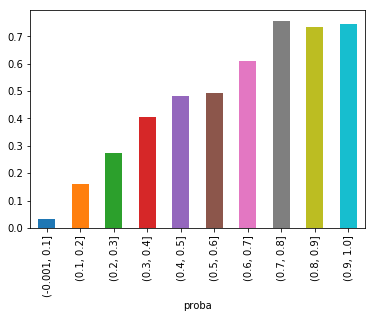

In [456]:
ev.groupby('proba').truth.mean().plot.bar()

# Gradient Boosting

In [409]:
from sklearn.ensemble import GradientBoostingClassifier

In [417]:
gb = GradientBoostingClassifier(n_estimators=10, learning_rate = 0.5)

In [418]:
%time gb.fit(X_train, Y_train)

CPU times: user 42.1 s, sys: 2.13 s, total: 44.2 s
Wall time: 46 s


GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.5, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=10,
              presort='auto', random_state=None, subsample=1.0, verbose=0,
              warm_start=False)

In [419]:
roc_scorer_fun(Y_train, gb.predict_proba(X_train))
roc_scorer_fun(Y_holdout, gb.predict_proba(X_holdout))

0.8244133783322756

0.7963064636690587

In [861]:
gb_preds = gb.predict_proba(X_holdout)[:, 1]

Text(0.5,1,'Gradient Boosting Predicted Probabilities (Holdout)')

Text(0,0.5,'Number of Observations')

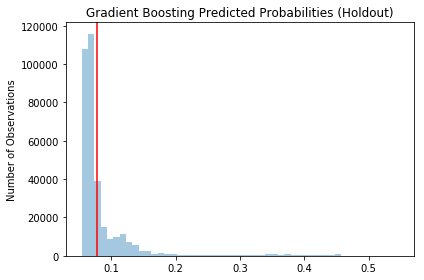

In [865]:
fig,ax =plt.subplots()
sns.distplot(gb_preds, ax=ax, kde=False)
ax.axvline(0.0771484375, color='red')
ax.set_title('Gradient Boosting Predicted Probabilities (Holdout)')
ax.set_ylabel('Number of Observations')
plt.tight_layout()
plt.savefig('figures/gb_pred_prob.png', dpi=200)

In [867]:
confusion_matrix(Y_holdout, gb_preds>0.0771484375)/len(Y_holdout)

array([[0.67331653, 0.24459747],
       [0.01857357, 0.06351243]])

In [575]:
gb.set_params(n_estimators=50, learning_rate=0.01, max_depth=10, verbose=10)
%time gb.fit(X_train, Y_train)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.01, loss='deviance', max_depth=10,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=50,
              presort='auto', random_state=None, subsample=1.0, verbose=10,
              warm_start=False)

      Iter       Train Loss   Remaining Time 
         1           0.5951           25.67m
         2           0.5885           24.94m
         3           0.5824           24.62m
         4           0.5766           24.11m
         5           0.5712           23.59m
         6           0.5661           23.11m
         7           0.5612           22.63m
         8           0.5566           22.13m
         9           0.5522           21.60m
        10           0.5481           21.08m
        11           0.5441           20.56m
        12           0.5402           20.06m
        13           0.5365           19.54m
        14           0.5328           19.04m
        15           0.5294           18.58m
        16           0.5261           18.05m
        17           0.5228           17.61m
        18           0.5197           17.09m
        19           0.5166           16.60m
        20           0.5137           16.06m
        21           0.5108           15.58m
        2

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.01, loss='deviance', max_depth=10,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=50,
              presort='auto', random_state=None, subsample=1.0, verbose=10,
              warm_start=False)

In [576]:
roc_scorer_fun(Y_train, gb.predict_proba(X_train))
roc_scorer_fun(Y_holdout, gb.predict_proba(X_holdout))

0.894965843462763

0.8399740162169276

In [577]:
models.append('Gradient Boosting')
AUC_training.append(roc_scorer_fun(Y_train, gb.predict_proba(X_train)))
AUC_holdout.append(roc_scorer_fun(Y_holdout, gb.predict_proba(X_holdout)))

<Figure size 720x360 with 0 Axes>

<BarContainer object of 20 artists>

Text(0.5,1,'Gradient Boosting Feature Importance')

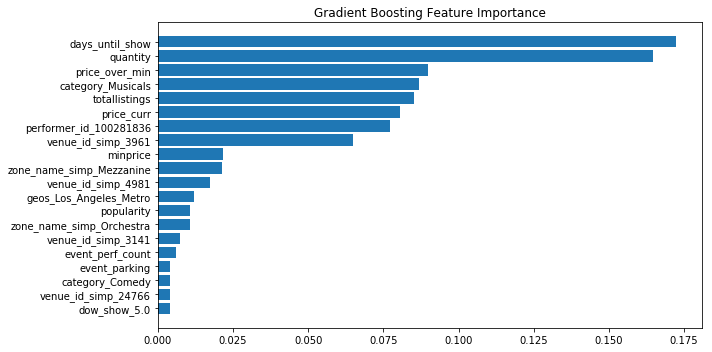

In [748]:
plt.figure(figsize=(10,5))
gb_feat_imp = pd.Series(gb.feature_importances_, index=X_train.columns).nlargest(20).sort_values()
plt.barh(width = gb_feat_imp, y = gb_feat_imp.index)
plt.title('Gradient Boosting Feature Importance')
plt.tight_layout()

plt.savefig('figures/gb_feat_imp.png', dpi=200, figsize=(14,4))

In [531]:
gb_param_grid = {'n_estimators': [100, 250, 500], 'learning_rate': [0.001, 0.1, 0.5], 'max_depth': [3, 10, None]}

gbgs = GridSearchCV(gb, gb_param_grid, scoring = roc_scorer, n_jobs = 3, cv = folds, verbose=10)

%time gbgs.fit(X_train, Y_train)

Fitting 5 folds for each of 27 candidates, totalling 135 fits
[CV] learning_rate=0.001, max_depth=3, n_estimators=100 ..............
[CV] learning_rate=0.001, max_depth=3, n_estimators=100 ..............
[CV] learning_rate=0.001, max_depth=3, n_estimators=100 ..............
[CV]  learning_rate=0.001, max_depth=3, n_estimators=100, score=0.7736401793084446, total= 5.9min
[CV]  learning_rate=0.001, max_depth=3, n_estimators=100, score=0.7798252109604213, total= 5.9min
[CV] learning_rate=0.001, max_depth=3, n_estimators=100 ..............
[CV] learning_rate=0.001, max_depth=3, n_estimators=100 ..............


[Parallel(n_jobs=3)]: Done   2 tasks      | elapsed:  6.2min


[CV]  learning_rate=0.001, max_depth=3, n_estimators=100, score=0.779887375408531, total= 5.9min
[CV] learning_rate=0.001, max_depth=3, n_estimators=250 ..............
[CV]  learning_rate=0.001, max_depth=3, n_estimators=100, score=0.7792659556504731, total= 5.8min
[CV] learning_rate=0.001, max_depth=3, n_estimators=250 ..............
[CV]  learning_rate=0.001, max_depth=3, n_estimators=100, score=0.7789036071013113, total= 5.8min
[CV] learning_rate=0.001, max_depth=3, n_estimators=250 ..............
[CV]  learning_rate=0.001, max_depth=3, n_estimators=250, score=0.7787484813742129, total=13.9min
[CV] learning_rate=0.001, max_depth=3, n_estimators=250 ..............
[CV]  learning_rate=0.001, max_depth=3, n_estimators=250, score=0.7736939357758765, total=13.9min
[CV] learning_rate=0.001, max_depth=3, n_estimators=250 ..............


[Parallel(n_jobs=3)]: Done   7 tasks      | elapsed: 26.4min


[CV]  learning_rate=0.001, max_depth=3, n_estimators=250, score=0.780766292841238, total=13.9min
[CV] learning_rate=0.001, max_depth=3, n_estimators=500 ..............
[CV]  learning_rate=0.001, max_depth=3, n_estimators=250, score=0.7792774893549963, total=13.9min
[CV] learning_rate=0.001, max_depth=3, n_estimators=500 ..............
[CV]  learning_rate=0.001, max_depth=3, n_estimators=250, score=0.7789450216323318, total=13.9min
[CV] learning_rate=0.001, max_depth=3, n_estimators=500 ..............
[CV]  learning_rate=0.001, max_depth=3, n_estimators=500, score=0.7813107451262737, total=27.4min
[CV] learning_rate=0.001, max_depth=3, n_estimators=500 ..............
[CV]  learning_rate=0.001, max_depth=3, n_estimators=500, score=0.7767527800514031, total=27.4min
[CV] learning_rate=0.001, max_depth=3, n_estimators=500 ..............


[Parallel(n_jobs=3)]: Done  12 tasks      | elapsed: 62.5min


[CV]  learning_rate=0.001, max_depth=3, n_estimators=500, score=0.7829371481102547, total=27.4min
[CV] learning_rate=0.001, max_depth=10, n_estimators=100 .............
[CV]  learning_rate=0.001, max_depth=3, n_estimators=500, score=0.7794709105278297, total=27.3min
[CV] learning_rate=0.001, max_depth=10, n_estimators=100 .............
[CV]  learning_rate=0.001, max_depth=3, n_estimators=500, score=0.7805136334654639, total=27.3min
[CV] learning_rate=0.001, max_depth=10, n_estimators=100 .............
[CV]  learning_rate=0.001, max_depth=10, n_estimators=100, score=0.8809336950670887, total=58.7min
[CV] learning_rate=0.001, max_depth=10, n_estimators=100 .............
[CV]  learning_rate=0.001, max_depth=10, n_estimators=100, score=0.8774853701259275, total=60.7min
[CV] learning_rate=0.001, max_depth=10, n_estimators=100 .............
[CV]  learning_rate=0.001, max_depth=10, n_estimators=100, score=0.8742025836520094, total=63.4min
[CV] learning_rate=0.001, max_depth=10, n_estimators=2

[Parallel(n_jobs=3)]: Done  19 tasks      | elapsed: 185.7min


[CV]  learning_rate=0.001, max_depth=10, n_estimators=100, score=0.8799187643798041, total=59.9min
[CV] learning_rate=0.001, max_depth=10, n_estimators=250 .............
[CV]  learning_rate=0.001, max_depth=10, n_estimators=250, score=0.8864657777268018, total=149.2min
[CV] learning_rate=0.001, max_depth=10, n_estimators=250 .............
[CV]  learning_rate=0.001, max_depth=10, n_estimators=250, score=0.8808167325474751, total=151.4min
[CV] learning_rate=0.001, max_depth=10, n_estimators=250 .............
[CV]  learning_rate=0.001, max_depth=10, n_estimators=250, score=0.8805154312200665, total=155.0min
[CV] learning_rate=0.001, max_depth=10, n_estimators=500 .............
[CV]  learning_rate=0.001, max_depth=10, n_estimators=250, score=0.8856665050297852, total=150.8min
[CV] learning_rate=0.001, max_depth=10, n_estimators=500 .............
[CV]  learning_rate=0.001, max_depth=10, n_estimators=250, score=0.8856110031583284, total=154.6min
[CV] learning_rate=0.001, max_depth=10, n_esti

KeyboardInterrupt: 

In [445]:
gbgs.grid_scores_

NotFittedError: This GridSearchCV instance is not fitted yet. Call 'fit' with appropriate arguments before using this method.

# Random

In [ ]:
rf.decision_path

(-0.2, 1.1)

(-0.1, 1.1)

Text(0.5,1,'ROC Curve')

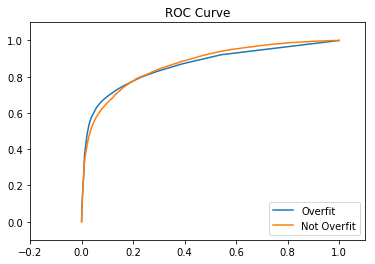

In [510]:
from sklearn.metrics import roc_curve

#Draw ROC Curve for balanced vs unbalanced

scoreA = rf_grid_tuned.predict_proba(X_holdout)[:,1]
scoreB = rf.predict_proba(X_holdout)[:,1]

A=roc_curve(Y_holdout,scoreA,pos_label=1)
B=roc_curve(Y_holdout,scoreB,pos_label=1)

plt.plot(A[0],A[1],label='Overfit')
plt.plot(B[0],B[1],label='Not Overfit')
plt.xlim((-0.2,1.1))
plt.ylim((-0.1,1.1))
plt.title('ROC Curve')
plt.legend(loc=4)

# QDA

In [511]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

In [525]:
#Training

QDA = QuadraticDiscriminantAnalysis(reg_param = 0.01)

%time QDA.fit(X_train.loc[:,~bernoulli_vars], Y_train)
QDA_pred = QDA.predict(X_train.loc[:,~bernoulli_vars])
QDA_proba = QDA.predict_proba(X_train.loc[:,~bernoulli_vars])

print('confusion_matrix:\n', confusion_matrix(Y_train, QDA_pred)) 
print('AUC %.3f' %(roc_auc_score(Y_train, QDA_proba[:,1]))) 
print('Accuracy: %.3f' %(QDA.score(X_train.loc[:,~bernoulli_vars], Y_train))) 

CPU times: user 1.29 s, sys: 327 ms, total: 1.62 s
Wall time: 869 ms


/Users/johnmcglynn/anaconda3/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:682: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/Users/johnmcglynn/anaconda3/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:682: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


QuadraticDiscriminantAnalysis(priors=None, reg_param=0.01,
               store_covariance=False, store_covariances=None, tol=0.0001)

confusion_matrix:
 [[541480 235948]
 [ 21059  55268]]
AUC 0.753
Accuracy: 0.699


In [526]:
pd.Series(QDA_pred).value_counts()

0    562539
1    291216
dtype: int64

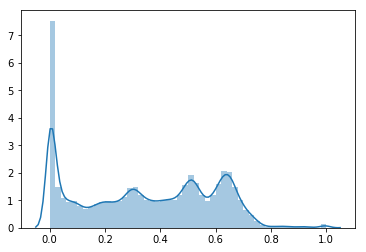

In [527]:
sns.distplot(QDA_proba[:, 1])

In [529]:
#Holdout

QDA_predT = QDA.predict(X_holdout.loc[:,~bernoulli_vars])
QDA_probaT = QDA.predict_proba(X_holdout.loc[:,~bernoulli_vars])

print('confusion_matrix:\n', confusion_matrix(Y_holdout, QDA_predT)) 
print('AUC %.3f' %(roc_auc_score(Y_holdout, QDA_probaT[:,1]))) 
print('Accuracy: %.3f' %(QDA.score(X_holdout.loc[:,~bernoulli_vars], Y_holdout))) 

confusion_matrix:
 [[214596 101596]
 [  8770  19506]]
AUC 0.726
Accuracy: 0.680


In [582]:
models.append('QDA')
AUC_training.append(roc_scorer_fun(Y_train, QDA.predict_proba(X_train.loc[:,~bernoulli_vars])))
AUC_holdout.append(roc_scorer_fun(Y_holdout, QDA.predict_proba(X_holdout.loc[:,~bernoulli_vars])))

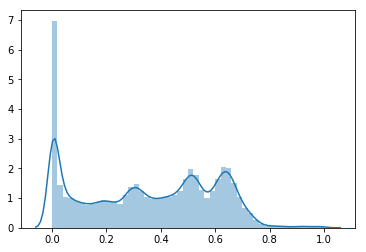

In [530]:
sns.distplot(QDA_probaT[:, 1])

In [522]:
ev = pd.DataFrame({'proba': pd.cut(QDA_probaT[:, 1], bins=50), 'truth':Y_holdout})
ev.head()

,proba,truth
123,"(0.98, 1.0]",0
124,"(0.98, 1.0]",0
125,"(0.98, 1.0]",0
239,"(0.98, 1.0]",0
240,"(0.98, 1.0]",0


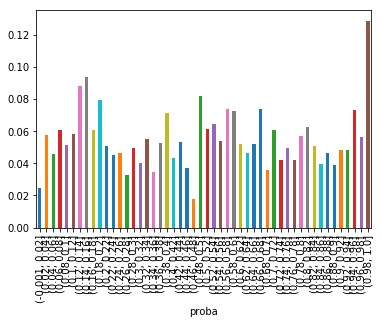

In [523]:
ev.groupby('proba').truth.mean().plot.bar()

# LDA

In [593]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [596]:
#Training

LDA = LinearDiscriminantAnalysis()

LDA.fit(X_train.loc[:,~bernoulli_vars], Y_train)
LDA_pred = LDA.predict(X_train.loc[:,~bernoulli_vars])
LDA_proba = LDA.predict_proba(X_train.loc[:,~bernoulli_vars])

print('confusion_matrix:\n', confusion_matrix(Y_train, LDA_pred)) 
print('AUC %.3f' %(roc_auc_score(Y_train, LDA_proba[:,1]))) 
print('Accuracy: %.3f' %(LDA.score(X_train.loc[:,~bernoulli_vars], Y_train))) 

/Users/johnmcglynn/anaconda3/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


LinearDiscriminantAnalysis(n_components=None, priors=None, shrinkage=None,
              solver='svd', store_covariance=False, tol=0.0001)

confusion_matrix:
 [[776979    449]
 [ 76308     19]]
AUC 0.705
Accuracy: 0.910


In [598]:
#Holdout

LDA_predT = LDA.predict(X_holdout.loc[:,~bernoulli_vars])
LDA_probaT = LDA.predict_proba(X_holdout.loc[:,~bernoulli_vars])

print('confusion_matrix:\n', confusion_matrix(Y_holdout, LDA_predT)) 
print('AUC %.3f' %(roc_auc_score(Y_holdout, LDA_probaT[:,1]))) 
print('Accuracy: %.3f' %(LDA.score(X_holdout.loc[:,~bernoulli_vars], Y_holdout))) 

confusion_matrix:
 [[316002    190]
 [ 28276      0]]
AUC 0.680
Accuracy: 0.917


In [599]:
models.append('LDA')
AUC_training.append(roc_scorer_fun(Y_train, LDA.predict_proba(X_train.loc[:,~bernoulli_vars])))
AUC_holdout.append(roc_scorer_fun(Y_holdout, LDA.predict_proba(X_holdout.loc[:,~bernoulli_vars])))

# Model Results Summary

In [601]:
# Add SVM manually -- Tom ran on a sample in his WB; we've ruled it out but just want to show in the graph
models.append('SVM')
AUC_training.append(0)
AUC_holdout.append(0)

In [606]:
# models = ['Logistic Regression', 'Bernoulli Naiive Bayes', 'Gaussian Naiive Bayes', 'Ensembled Naiive Bayes',
#          'Random Forest']
# AUC_training = [0.78, 0.75, 0.73, 0.77, 0.82]
# AUC_holdout = [0.76, 0.73, 0.70, 0.73, 0.79]

results_summ = pd.DataFrame({'models': models, 'Training': AUC_training, 'Holdout': AUC_holdout})
results_summ = results_summ.melt(id_vars=['models'])
results_summ = results_summ.rename(index=str, columns={'value': 'AUC', 'variable': 'Test'})
results_summ

,models,Test,AUC
0,Logistic Regression,Training,0.783145
1,Gaussian Naive Bayes,Training,0.732420
2,Bernoulli Naive Bayes,Training,0.750690
3,Ensembled Naive Bayes,Training,0.766696
4,Random Forest,Training,0.818895
5,Gradient Boosting,Training,0.894966
6,QDA,Training,0.752659
7,LDA,Training,0.705353
8,SVM,Training,0.000000
9,Logistic Regression,Holdout,0.756708


In [607]:
order = results_summ[results_summ['Test']=='Holdout'].sort_values('AUC', ascending=False).models.tolist()
order

['Gradient Boosting',
 'Random Forest',
 'Logistic Regression',
 'Ensembled Naive Bayes',
 'Bernoulli Naive Bayes',
 'QDA',
 'Gaussian Naive Bayes',
 'LDA',
 'SVM']

Text(0.5,1,'Training and Holdout Performance')

(0.5, 1)

Text(0,0.5,'')

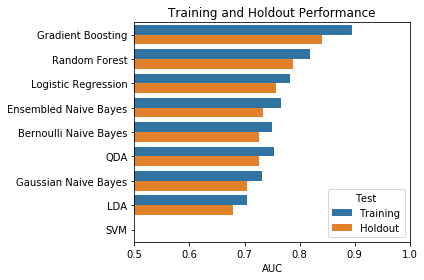

In [619]:
sns.barplot(y='models', x='AUC', hue='Test', order=order, data=results_summ)
plt.title('Training and Holdout Performance')
plt.xlim(0.5, 1)
plt.ylabel('')
plt.tight_layout()

plt.savefig('figures/model_comparison.png', dpi=200, figsize=(9,4))

# Viz

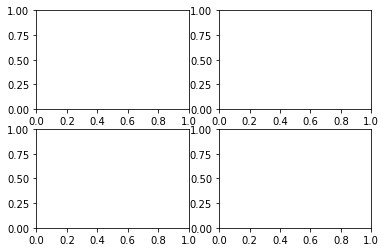

In [731]:
fig, ax = plt.subplots(2,2)

ax[0.]

# Loss Score

In [840]:
def ModelScore(prob_pred, actuals, prob_cut, fn_penalty = 15): #static result

    tn, fp, fn, tp = confusion_matrix(actuals, prob_pred > prob_cut).ravel()
    
    return (fn_penalty*fn + 1*fp) / prob_pred.shape[0]

def rbsLoss(p, q, prob_pred, actuals, fn_penalty = 15): #recursive binary search
    
    eps = (q-p) / 50
    tol = .0005
    
    if((q-p) < tol):
        return (p, ModelScore(prob_pred, actuals, p, fn_penalty = 15))
    
    m = (p + q) / 2.0
    
    if(ModelScore(prob_pred, actuals, m, fn_penalty = 15) > ModelScore(prob_pred, actuals, m+eps, fn_penalty = 15)):
        return rbsLoss(m,q,prob_pred, actuals, fn_penalty = 15)
    else:
        return rbsLoss(p,m,prob_pred, actuals, fn_penalty = 15)
    
def ModelOpt(preds_train, y_train, preds_test, y_test):
    
    trainingData = rbsLoss(0,1,preds_train, y_train) # (p_train, train_ModelScore)
    testData = (trainingData[0],ModelScore(preds_test, y_test, trainingData[0],
                                           fn_penalty = 15)) # (p_train, test_ModelScore)
    
    return (trainingData, testData)

In [841]:
loss_train, loss_holdout = [], []

In [842]:
loss_t, loss_h = ModelOpt(logit_pipe.predict_proba(X_train)[:,1],
                                    Y_train, logit_pipe.predict_proba(X_holdout)[:,1], Y_holdout)

In [843]:
loss_train.append(loss_t[1])
loss_holdout.append(loss_h[1])

In [844]:
loss_t, loss_h = ModelOpt(gnb.predict_proba(X_train.loc[:, ~bernoulli_vars])[:,1], Y_train,
                          gnb.predict_proba(X_holdout.loc[:, ~bernoulli_vars])[:,1], Y_holdout)
loss_train.append(loss_t[1])
loss_holdout.append(loss_h[1])

In [845]:
loss_t, loss_h = ModelOpt(bnb.predict_proba(X_train_nb.loc[:, bernoulli_vars])[:,1], Y_train,
                          bnb.predict_proba(X_holdout_nb.loc[:, bernoulli_vars])[:,1], Y_holdout)
loss_train.append(loss_t[1])
loss_holdout.append(loss_h[1]) 

In [846]:
loss_t, loss_h = ModelOpt(ensemble_logit.predict_proba(train_predicts)[:,1], Y_train,
                          ensemble_logit.predict_proba(holdout_predicts)[:,1], Y_holdout)
loss_train.append(loss_t[1])
loss_holdout.append(loss_h[1]) 

In [847]:
loss_t, loss_h = ModelOpt(rf.predict_proba(X_train)[:,1], Y_train,
                          rf.predict_proba(X_holdout)[:,1], Y_holdout)
loss_train.append(loss_t[1])
loss_holdout.append(loss_h[1]) 

In [848]:
loss_t, loss_h = ModelOpt(gb.predict_proba(X_train)[:,1], Y_train,
                          gb.predict_proba(X_holdout)[:,1], Y_holdout)
loss_train.append(loss_t[1])
loss_holdout.append(loss_h[1]) 

In [849]:
loss_t, loss_h = ModelOpt(QDA.predict_proba(X_train.loc[:,~bernoulli_vars])[:,1], Y_train,
                          QDA.predict_proba(X_holdout.loc[:,~bernoulli_vars])[:,1], Y_holdout)
loss_train.append(loss_t[1])
loss_holdout.append(loss_h[1]) 

In [850]:
loss_t, loss_h = ModelOpt(LDA.predict_proba(X_train.loc[:,~bernoulli_vars])[:,1], Y_train,
                          LDA.predict_proba(X_holdout.loc[:,~bernoulli_vars])[:,1], Y_holdout)
loss_train.append(loss_t[1])
loss_holdout.append(loss_h[1]) 

In [851]:
results_summ_loss = pd.DataFrame({'models': models[:-1], 'Training': loss_train, 'Holdout': loss_holdout})
results_summ_loss = results_summ_loss.melt(id_vars=['models'])
results_summ_loss = results_summ_loss.rename(index=str, columns={'value': 'Loss Value', 'variable': 'Test'})
results_summ_loss

,models,Test,Loss Value
0,Logistic Regression,Training,0.612739
1,Gaussian Naive Bayes,Training,0.661861
2,Bernoulli Naive Bayes,Training,0.662571
3,Ensembled Naive Bayes,Training,0.639275
4,Random Forest,Training,0.586138
5,Gradient Boosting,Training,0.436240
6,QDA,Training,0.641839
7,LDA,Training,1.341030
8,Logistic Regression,Holdout,0.640161
9,Gaussian Naive Bayes,Holdout,0.702393


In [852]:
order_loss = results_summ_loss[results_summ_loss['Test']=='Holdout'].sort_values('Loss Value').models.tolist()
order_loss

['Gradient Boosting',
 'Random Forest',
 'Logistic Regression',
 'QDA',
 'Ensembled Naive Bayes',
 'Bernoulli Naive Bayes',
 'Gaussian Naive Bayes',
 'LDA']

Text(0.5,1,'Training and Holdout Loss')

Text(0,0.5,'')

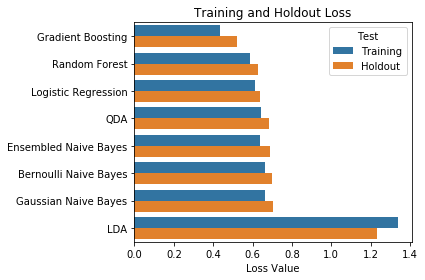

In [853]:
sns.barplot(y='models', x='Loss Value', hue='Test', order=order_loss, data=results_summ_loss)
plt.title('Training and Holdout Loss')
#plt.xlim(0.5, 1)
plt.ylabel('')
plt.tight_layout()

plt.savefig('figures/model_comparison_loss.png', dpi=200, figsize=(9,4))

# Debugging Loss Function Optimization

In [800]:
def ModelScore2(prob_pred, actuals, prob_cut, fn_penalty = 15):

    tn, fp, fn, tp = confusion_matrix(actuals, prob_pred > prob_cut).ravel()
    
    return fn_penalty*fn + 1*fp

preds = gb.predict_proba(X_train)[:,1]

In [802]:
x = np.linspace(0,1,101)
y = np.zeros(101)
i = 0

for each in x:
    y[i] = ModelScore2(preds, Y_train, each)
    i = i+1

In [838]:
ModelOpt(gb.predict_proba(X_train)[:,1], Y_train,
                          gb.predict_proba(X_holdout)[:,1], Y_holdout)

((0.0771484375, 0.4362399048907473), (0.0771484375, 0.5232009939965396))

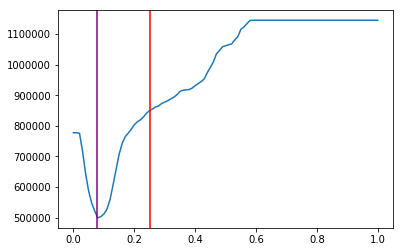

In [839]:
plt.plot(x, y)
plt.axvline(0.25, color='r')
plt.axvline(0.0771484375, color='purple')

In [809]:
min(y)/len(X_train)

0.4331277708476085

In [819]:
#Find threshold --> 0.08
pd.Series(y).sort_values()
x[8]

8       369785.0
9       374309.0
10      387952.0
7       396791.0
11      403328.0
12      416333.0
13      469173.0
14      515557.0
15      550629.0
16      564802.0
17      584192.0
18      606492.0
19      614785.0
20      625433.0
6       630641.0
21      631694.0
22      639915.0
23      646285.0
24      655695.0
25      670563.0
26      676941.0
27      684062.0
28      698876.0
29      717656.0
30      733247.0
31      751641.0
0       777428.0
5       777428.0
4       777428.0
3       777428.0
         ...    
96     1144905.0
97     1144905.0
98     1144905.0
77     1144905.0
99     1144905.0
76     1144905.0
74     1144905.0
53     1144905.0
54     1144905.0
55     1144905.0
56     1144905.0
57     1144905.0
58     1144905.0
59     1144905.0
60     1144905.0
61     1144905.0
62     1144905.0
63     1144905.0
64     1144905.0
65     1144905.0
66     1144905.0
67     1144905.0
68     1144905.0
69     1144905.0
70     1144905.0
71     1144905.0
72     1144905.0
73     1144905

0.08

In [813]:
# Update gb
results_summ_loss.iloc[5,2] = min(y)/len(X_train)

In [823]:
results_summ_loss.iloc[13, 2] = ModelScore2(gb.predict_proba(X_holdout)[:,1], Y_holdout, 0.08)/len(Y_holdout)

In [825]:
order_loss = results_summ_loss[results_summ_loss['Test']=='Holdout'].sort_values('Loss Value').models.tolist()
order_loss

['Gradient Boosting',
 'Logistic Regression',
 'Random Forest',
 'Ensembled Naive Bayes',
 'QDA',
 'Gaussian Naive Bayes',
 'Bernoulli Naive Bayes',
 'LDA']

Text(0.5,1,'Training and Holdout Loss')

Text(0,0.5,'')

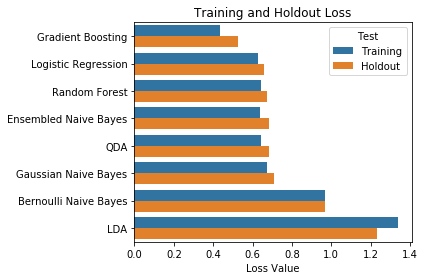

In [826]:
sns.barplot(y='models', x='Loss Value', hue='Test', order=order_loss, data=results_summ_loss)
plt.title('Training and Holdout Loss')
#plt.xlim(0.5, 1)
plt.ylabel('')
plt.tight_layout()

plt.savefig('figures/model_comparison_loss.png', dpi=200, figsize=(9,4))

In [827]:
def ModelScore2(prob_pred, actuals, prob_cut, fn_penalty = 15):

    tn, fp, fn, tp = confusion_matrix(actuals, prob_pred > prob_cut).ravel()
    
    return fn_penalty*fn + 1*fp

preds = rf.predict_proba(X_train)[:,1]

In [828]:
x = np.linspace(0,1,101)
y = np.zeros(101)
i = 0

for each in x:
    y[i] = ModelScore2(preds, Y_train, each)
    i = i+1

In [833]:
ModelOpt(rf.predict_proba(X_train)[:,1], Y_train,
                          rf.predict_proba(X_holdout)[:,1], Y_holdout)

((0.0888671875, 0.5861377092959924), (0.0888671875, 0.6277041699083804))

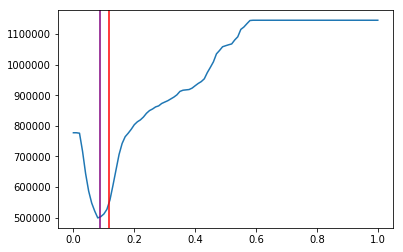

In [837]:
plt.plot(x, y)
plt.axvline(0.1162109375, color='r')
plt.axvline(0.0888671875, color='purple')